### File to process the images into a numpy array to pickle

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import pandas as pd

In [114]:
dataX = np.empty((7000, 200, 200, 3))

count = 0
for Lat in range(100):
    for Lng in range(70):
        dataX[count] = cv2.imread('./images/'+str(Lat)+'_'+str(Lng)+'.png')
        count+=1
dataX = dataX.astype(np.uint8)

In [115]:
dataX.shape

(7000, 200, 200, 3)

In [116]:
with open('dataX', 'wb') as fp:
    pickle.dump(dataX, fp, protocol=2)

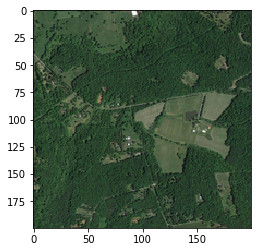

In [117]:
temp = cv2.cvtColor(dataX[0], cv2.COLOR_BGR2RGB)
plt.imshow(temp)
#plt.imshow(imageio.imread('./images/0_0.png'))
plt.show()

In [118]:
df_loaded = pd.read_csv('labels.csv', index_col=0)

In [119]:
dataY = np.empty((7000))
count1 = 0
for Lat in range(99,-1,-1):
    for Lng in range(70):
        dataY[count1] = df_loaded.iloc[Lat,Lng]
        count1+=1

In [120]:
with open('dataY', 'wb') as fp:
    pickle.dump(dataY, fp, protocol=2)